In [106]:
%matplotlib notebook

In [2]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st

In [3]:
#Read Denver crime data file
csv_path1='Resources/crime.csv'
denver_crime_df=pd.read_csv(csv_path1)
#denver_crime_df.head()

In [4]:
#Remove unwanted columns
crime_df=pd.DataFrame({
                       'Offense Type':denver_crime_df['OFFENSE_TYPE_ID'],
                       'Offense Category':denver_crime_df['OFFENSE_CATEGORY_ID'],
                       'Occurrence Date':denver_crime_df['FIRST_OCCURRENCE_DATE'],
                       })

#Split year and month into different columns
new = crime_df['Occurrence Date'].str.split(" ", n = -1, expand = True)
new = new[0].str.split("/",expand=True)
crime_df['Month']=new[0]
crime_df['Year']=new[2]
crime_df=crime_df.drop(['Occurrence Date'],axis=1)

#Remove offense categories except the most common
crime_df=crime_df.loc[((crime_df['Offense Category']=='drug-alcohol')|(crime_df['Offense Category']=='murder')|
                      (crime_df['Offense Category']=='public-disorder')|(crime_df['Offense Category']=='aggravated-assault')|
                        (crime_df['Offense Category']=='traffic-accident')&(crime_df['Offense Type']=='traffic-accident-dui-duid'))]

#Remove all years except 2013-2016 to match other data
crime_df=crime_df.loc[((crime_df['Year']=='2013')|(crime_df['Year']=='2014')|
                       (crime_df['Year']=='2015')|(crime_df['Year']=='2016'))]
#crime_df.head()

In [5]:
#Create dataframe for total dui's by month/year
dui=crime_df.loc[crime_df['Offense Category']=='traffic-accident']
dui.loc[:,('Month')]=dui['Month'].astype(int)
dui=dui.drop(['Offense Category'],axis=1)
dui=dui.reset_index()
dui=dui.drop(['index'],axis=1)
dui=dui.groupby(['Year','Month']).count()
dui['Total DUIs']=dui['Offense Type']
dui=dui.drop(['Offense Type'],axis=1)
#dui.head()

C:\Users\erikt\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [6]:
#Create dataframe for total disorder charges by month/year
disorder=crime_df.loc[crime_df['Offense Category']=='public-disorder']
disorder['Month'] = disorder['Month'].astype(int)
disorder=disorder.groupby(['Year','Month']).count()
disorder['Total Disorder Charges']=disorder['Offense Type']
disorder=disorder.drop(['Offense Type'],axis=1)
disorder=disorder.drop(['Offense Category'],axis=1)
#disorder.head()

<ipython-input-6-23a1acf85735>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disorder['Month'] = disorder['Month'].astype(int)


In [7]:
#Create dataframe for total assaults by month/year
assault=crime_df.loc[crime_df['Offense Category']=='aggravated-assault']
assault['Month']=assault['Month'].astype(int)
assault=assault.groupby(['Year','Month']).count()
assault['Total Assaults']=assault['Offense Type']
assault=assault.drop(['Offense Type'],axis=1)
assault=assault.drop(['Offense Category'],axis=1)
#assault.head()

<ipython-input-7-7e4d826c9434>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assault['Month']=assault['Month'].astype(int)


In [8]:
#create dataframe for total murders by month/year
murder=crime_df.loc[crime_df['Offense Category']=='murder']
murder['Month']=murder['Month'].astype(int)
murder=murder.groupby(['Year','Month']).count()
murder['Total Murders']=murder['Offense Type']
murder=murder.drop(['Offense Type'],axis=1)
murder=murder.drop(['Offense Category'],axis=1)
#murder.head()

<ipython-input-8-502fd643a1a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  murder['Month']=murder['Month'].astype(int)


In [9]:
#Create dataframe for dui's,disorder,assaults and murders by month/year
full=pd.merge(dui,disorder,on=('Year','Month'))
full=pd.merge(full,assault,on=('Year','Month'))
full=pd.merge(full,murder,on=('Year','Month'))
#full.head()

In [19]:
drug=crime_df.loc[crime_df['Offense Category']=='drug-alcohol']
drug=drug.replace(['liquor-possession','liquor-sell','liquor-other-viol','liquor-misrepresent-age-minor','liquor-manufacturing'],'Alcohol Offenses')
drug=drug.replace(['drug-marijuana-possess','drug-marijuana-sell','drug-marijuana-cultivation'],'Marijuana Offenses')
drug=drug.replace(['drug-methampetamine-possess','drug-methampetamine-sell','drug-methamphetamine-mfr'],'Methamphetamine Offenses')
drug=drug.replace(['drug-cocaine-possess','drug-cocaine-sell'],'Cocaine Offenses')
drug=drug.replace(['drug-heroin-possess','drug-heroin-sell'],'Heroin Offenses')
drug=drug.replace(['drug-hallucinogen-possess','drug-hallucinogen-sell','drug-hallucinogen-mfr'],'Hallucinogen Offenses')
drug=drug.replace(['drug-barbiturate-possess','drug-barbiturate-sell','drug-barbiturate-mfr'],'Barbiturate Offenses')
drug=drug.replace(['drug-opium-or-deriv-possess','drug-opium-or-deriv-sell'],'Opium/Derivitave Offenses')
drug=drug.replace(['drug-synth-narcotic-possess','drug-synth-narcotic-sell'],'Synthetic Narcotic Offenses')
drug=drug.replace(['drug-pcs-other-drug','drug-make-sell-other-drug'],'Other Drug Offenses')
drug=drug.replace(['drug-poss-paraphernalia'],'Paraphernalia Offenses')
drug=drug.loc[drug['Offense Type']!='drug-fraud-to-obtain']
drug=drug.drop(['Offense Category'],axis=1)
drug=drug.reindex(columns=['Year','Month','Offense Type'])
drug=drug.sort_values(by=['Year','Month','Offense Type'])
total=""
drug['Total']=total
alcohol=drug.loc[drug['Offense Type']=='Alcohol Offenses']
alcohol['Month']=alcohol['Month'].astype(int)
alcohol2=alcohol.loc[alcohol['Year']!='2013']
alcohol2['Total Charges']=alcohol2['Total']
alcohol2=alcohol2.drop(['Total'],axis=1)
alcohol2=alcohol2.groupby(['Year','Month','Offense Type']).count()
alcohol=alcohol.groupby(['Year','Month','Offense Type']).count()
methamphetamine=drug.loc[drug['Offense Type']=='Methamphetamine Offenses']
methamphetamine['Month']=methamphetamine['Month'].astype(int)
methamphetamine=methamphetamine.groupby(['Year','Month','Offense Type']).count()
cocaine=drug.loc[drug['Offense Type']=='Cocaine Offenses']
cocaine['Month']=cocaine['Month'].astype(int)
cocaine=cocaine.groupby(['Year','Month','Offense Type']).count()
heroin=drug.loc[drug['Offense Type']=='Heroin Offenses']
heroin['Month']=heroin['Month'].astype(int)
heroin=heroin.groupby(['Year','Month','Offense Type']).count()
hallucinogen=drug.loc[drug['Offense Type']=='Hallucinogen Offenses']
hallucinogen['Month']=hallucinogen['Month'].astype(int)
hallucinogen=hallucinogen.groupby(['Year','Month','Offense Type']).count()
barbiturate=drug.loc[drug['Offense Type']=='Barbiturate Offenses']
barbiturate['Month']=barbiturate['Month'].astype(int)
barbiturate=barbiturate.groupby(['Year','Month','Offense Type']).count()
opium=drug.loc[drug['Offense Type']=='Opium/Derivitave Offenses']
opium['Month']=opium['Month'].astype(int)
opium=opium.groupby(['Year','Month','Offense Type']).count()
synthnarc=drug.loc[drug['Offense Type']=='Synthetic Narcotic Offenses']
synthnarc['Month']=synthnarc['Month'].astype(int)
synthnarc=synthnarc.groupby(['Year','Month','Offense Type']).count()
other=drug.loc[drug['Offense Type']=='Other Drug Offenses']
other['Month']=other['Month'].astype(int)
other=other.groupby(['Year','Month','Offense Type']).count()
paraphernalia=drug.loc[drug['Offense Type']=='Paraphernalia Offenses']
paraphernalia['Month']=paraphernalia['Month'].astype(int)
paraphernalia=paraphernalia.groupby(['Year','Month','Offense Type']).count()
drug=drug.groupby(['Year','Month','Offense Type']).count()
#drug


<ipython-input-19-b925306ddeb7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcohol['Month']=alcohol['Month'].astype(int)
<ipython-input-19-b925306ddeb7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcohol2['Total Charges']=alcohol2['Total']
<ipython-input-19-b925306ddeb7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [12]:
#Read in Marijuana sales data
csv_path2='Resources/Marijuana_Sales_Revenue_in_Colorado.csv'
sales_df=pd.read_csv(csv_path2)
#sales_df.head()

In [13]:
#Drop unwanted columns and blank rows
sales_df=sales_df.drop(['Med_Blank_Code','Rec_Blank_Code','ID'],axis=1)
sales_df=sales_df.dropna(thresh=4)

#Pull data only from years 2013-2016 to match crime data
sales_df=sales_df.loc[((sales_df['Year']==2013)|(sales_df['Year']==2014)|
                       (sales_df['Year']==2015)|(sales_df['Year']==2016))]

#Remove all counties that are not in Denver to match crime data
sales_df=sales_df.loc[((sales_df['County']=='Denver')|(sales_df['County']=='Arapahoe')|
                       (sales_df['County']=='Douglas')|(sales_df['County']=='Jefferson')|
                       (sales_df['County']=='Adams')|(sales_df['County']=='Boulder')|
                       (sales_df['County']=='Broomfield'))]

#Combine med/rec sales, sort and group by year, month and sum of sales 
sales_df['Med_Sales']=sales_df['Med_Sales'].convert_dtypes()
sales_df['Med_Sales']=sales_df['Med_Sales'].str.replace(',','')
sales_df['Med_Sales']=sales_df['Med_Sales'].astype('int64')
sales_df['Rec_Sales']=sales_df['Rec_Sales'].convert_dtypes()
sales_df['Rec_Sales']=sales_df['Rec_Sales'].str.replace(',','')
sales_df['Rec_Sales']=sales_df['Rec_Sales'].astype('Int64')
sales_df['Total']=sales_df['Med_Sales']+sales_df['Rec_Sales']
sales_df=sales_df.fillna(value=0)
sales_df['Total']=sales_df['Med_Sales']+sales_df['Rec_Sales']
sales_df=sales_df.drop(['County'],axis=1)
sales_df=sales_df.drop(['Med_Sales'],axis=1)
sales_df=sales_df.drop(['Rec_Sales'],axis=1)
sales_df=sales_df.reindex(columns=['Year','Month','Total'])
sales_df=sales_df.groupby(['Year','Month']).sum()
#sales_df.head()

In [14]:
#Assign variable 'months' for x axes
months=[2013,'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
        2014,'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
        2015,'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
        2016,'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',]
months2=[2014,'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
        2015,'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
        2016,'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

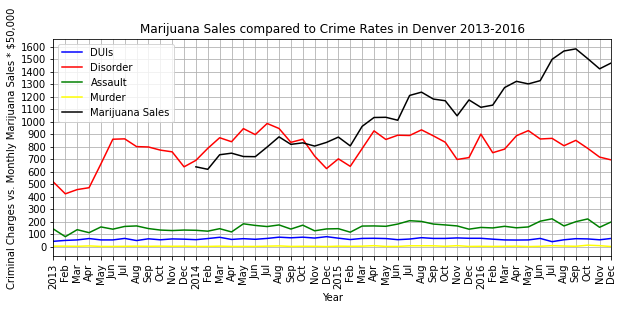

In [21]:
#Create line plot comparing marijuana sales to common crimes
X = np.arange(48)
X2 = np.arange(12,48,1)
fig=plt.figure(figsize=(10,4))
plt.title('Marijuana Sales compared to Crime Rates in Denver 2013-2016')
plt.xlim(0,47)
plt.xlabel('Year')
plt.xticks(np.arange(48),rotation='vertical',labels=months)
plt.ylabel('Criminal Charges vs. Monthly Marijuana Sales * $50,000')
plt.yticks(np.arange(0,2000,100))
plt.plot(X,full['Total DUIs'],color='blue',label='DUIs')
plt.plot(X,full['Total Disorder Charges'],color='red',label='Disorder')
plt.plot(X,full['Total Assaults'],color='green',label='Assault')
plt.plot(X,full['Total Murders'],color='yellow',label='Murder')
plt.plot(X2,(sales_df['Total']/50000),color='black',label='Marijuana Sales')
plt.legend(loc=2)
plt.grid()
plt.savefig('output_data/plot1')
plt.show()

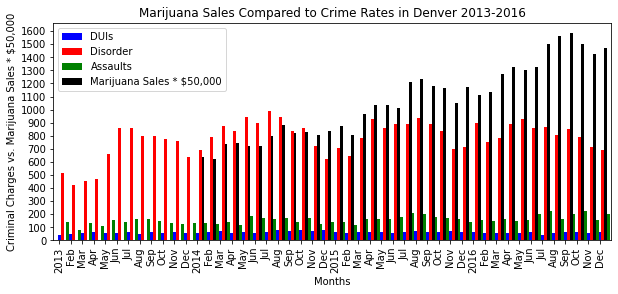

In [22]:
#Create bar chart comparing marijuana sales to common crimes
X = np.arange(48)
X2 = np.arange(12,48,1)
fig = plt.figure(figsize=(10,4))
plt.title('Marijuana Sales Compared to Crime Rates in Denver 2013-2016')
plt.ylabel('Criminal Charges vs. Marijuana Sales * $50,000')
plt.yticks(np.arange(0,2000,100))
plt.xlabel('Months')
plt.xticks(np.arange(48),rotation='vertical',labels=months)
plt.xlim(-.5,48)
plt.bar(X + 0.00, full['Total DUIs'], color = 'b', width = 0.25)
plt.bar(X + 0.25, full['Total Disorder Charges'], color = 'r', width = 0.25)
plt.bar(X + 0.75, full['Total Assaults'], color = 'g', width = 0.25)
plt.bar(X2 + .5,(sales_df['Total']/50000),color='black',width=.25)
plt.legend(labels=('DUIs','Disorder','Assaults','Marijuana Sales * $50,000'))
plt.savefig('output_data/plot2')
plt.show()

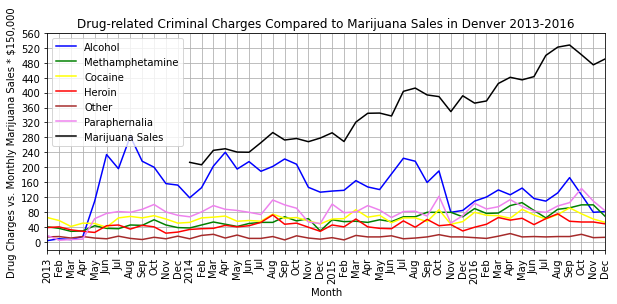

In [23]:
#Create line plot comparing marijuana sales to drug crimes
X = np.arange(48)
X2 = np.arange(12,48,1)
fig=plt.figure(figsize=(10,4))
plt.plot(X,alcohol,color='blue',label='Alcohol')
plt.plot(X,methamphetamine,color='green',label='Methamphetamine')
plt.plot(X,cocaine,color='yellow',label='Cocaine')
plt.plot(X,heroin,color='red',label='Heroin')
plt.plot(X,other,color='brown',label='Other')
plt.plot(X,paraphernalia,color='violet',label='Paraphernalia')
plt.plot(X2,(sales_df['Total']/150000),color='black',label='Marijuana Sales')
plt.xlim(0,47)
plt.title('Drug-related Criminal Charges Compared to Marijuana Sales in Denver 2013-2016')
plt.xlabel('Month')
plt.xticks(np.arange(48),rotation='vertical',labels=months)
plt.ylabel('Drug Charges vs. Monthly Marijuana Sales * $150,000')
plt.yticks(np.arange(0,600,40))
plt.legend(loc=2)
plt.grid()
plt.savefig('output_data/plot3')
plt.show()

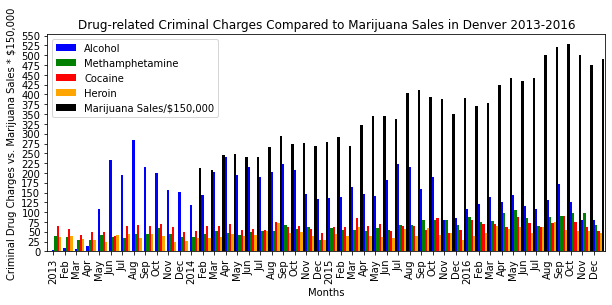

In [24]:
#Create bar chart comparing marijuana sales to drug crimes
X = np.arange(48)
X2=np.arange(12,48,1)
fig = plt.figure(figsize=(10,4))
plt.title('Drug-related Criminal Charges Compared to Marijuana Sales in Denver 2013-2016')
plt.ylabel('Criminal Drug Charges vs. Marijuana Sales * $150,000')
plt.yticks(np.arange(0,575,25))
plt.xlabel('Months')
plt.xticks(np.arange(48),rotation='vertical',labels=months)
plt.xlim(-.5,48)
plt.bar(X + 0.00, alcohol['Total'], color = 'b', width = 0.2)
plt.bar(X + 0.2, methamphetamine['Total'], color = 'g', width = 0.2)
plt.bar(X + 0.4, cocaine['Total'], color = 'r', width = 0.2)
plt.bar(X + .6, heroin['Total'], color = 'orange', width = 0.2)
plt.bar(X2 + .8, (sales_df['Total']/150000), color = 'black', width = 0.2)
plt.legend(labels=('Alcohol','Methamphetamine','Cocaine','Heroin','Marijuana Sales/$150,000'))
plt.savefig('output_data/plot4')
plt.show()

In [17]:
#Create new dataframe to compare alcohol crimes directly to marijuana sales
alcohol2=alcohol2.reset_index()
sales_df=sales_df.reset_index()
combined=pd.merge(alcohol2,sales_df,left_index=True,right_index=True)

The rvalue is: -0.4335156127567948
The r-squared is: 0.18793578650389925


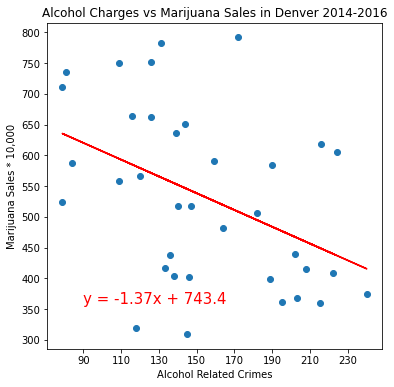

In [25]:
#create scatterplot and regression to examine relationship between marijuana sales and alcohol related crimes
x_values = combined['Total Charges']
y_values = combined['Total']/100000
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.figure(figsize=(6,6))
plt.title('Alcohol Charges vs Marijuana Sales in Denver 2014-2016')
plt.ylabel('Marijuana Sales * 10,000')
plt.yticks(np.arange(300,900,50))
plt.xlabel('Alcohol Related Crimes')
plt.xticks(np.arange(70,251,20))
print(f"The rvalue is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(90,360),fontsize=15,color="red")
plt.savefig('output_data/plot5')
plt.show()